# Example how to calculate the RV precision

Simple example of how to calculate precision, No convolution or SNR scaling is preformed.

In [1]:
import os

import matplotlib.pyplot as plt

from eniric import config, precision

In [2]:
# Load a spectrum
from astropy.io import fits

test_data = config.paths["phoenix_raw"]
print(test_data)

wav = fits.getdata(os.path.join(test_data, "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"))
flux = fits.getdata(
    os.path.join(
        test_data, "Z-0.0", "lte03900-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"
    )
)
# This is a bit long
print(len(flux))

..\..\data\test_data\phoenix-raw
1569128


In [3]:
# Take a section of wavelength
xmin = 2000  # nm
xmax = 3000  # nm
mask = (wav >= xmin) & (wav <= xmax)
wav = wav[mask]
flux = flux[mask]

print(len(flux))

10001


In [4]:
# Calculate precision with no masking and without scaling
rv_precision = precision.rv_precision(wavelength=wav, flux=flux)

print(f"RV precision between {xmin}-{xmax}nm = {rv_precision:1.6f}")

RV precision between 2000-3000nm = 0.000416 m / s


This precision has not been scaled to a specific flux/SNR level.

In [5]:
# Calculate spectral quality also with no masking and without scaling
quality = precision.quality(wavelength=wav, flux=flux)

print(f"Spectral quality between {xmin}-{xmax}nm = {quality:7.1f}")

Spectral quality between 2000-3000nm = 21490.5


## Scaling Effects
Scaling the flux of the spectrum affects the RV precision, Need to scale to known SNR level for relative comparisions.

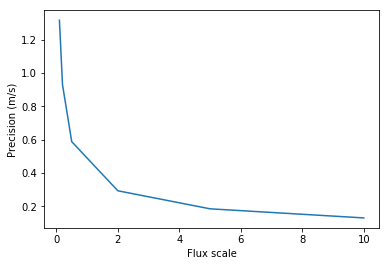

In [6]:
# The precision needs to be scaled to the relative SNR.
# 1/1e6 scales the test data flux to give sensible numbers here.
scales = [0.1, 0.2, 0.5, 2, 5, 10]
prec = [
    precision.rv_precision(wavelength=wav, flux=flux / 1e6 * scale).value
    for scale in scales
]

plt.plot(scales, prec)
plt.xlabel("Flux scale")
plt.ylabel("Precision (m/s)")
plt.show()